XYZ Company has offices in four different zones. The company wishes to
investigate the following :
● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Sales_data_zone_wise.csv")
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.shape

(29, 5)

In [4]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64


# ● The mean sales generated by each zone.

In [5]:
desc=df.describe()
#df.mean()
display(desc.loc["mean"])

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
Name: mean, dtype: float64

# ● Total sales generated by all the zones for each month.

In [6]:
new_df=df.copy()

#define col_list as a list of all DataFrame column names
col_list= list(new_df)

#remove the column 'Month' from the list
col_list.remove('Month')

#define new DataFrame column for sum of rows as 'Total Sales' 
new_df['Total_Sales'] = new_df[col_list].sum(axis=1)

#view DataFrame
display(new_df)

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [7]:
#new_df.sort_values(by='new_sum',ascending=False)
largest=new_df['Total_Sales'].nlargest(1)
smallest=new_df['Total_Sales'].nsmallest(1)
lar_det=new_df.iloc[largest.index[0]]
sma_det=new_df.iloc[smallest.index[0]]
print(lar_det['Month'],"has the highest sales in all the zones with a total of ",
      lar_det['Total_Sales'],'and \n',sma_det['Month'],' has the least sales of the amount',sma_det['Total_Sales'])

Month - 4 has the highest sales in all the zones with a total of  8174449 and 
 Month - 13  has the least sales of the amount 5925424


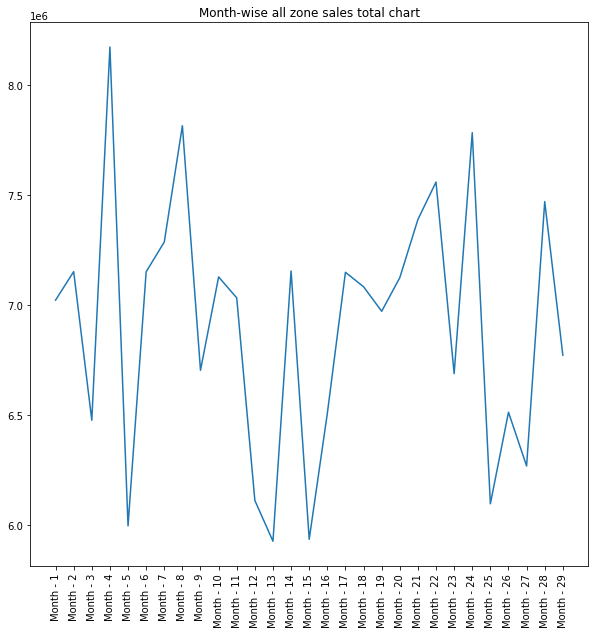

In [8]:
plt.figure(figsize=(10,10))
plt.plot(new_df['Month'],new_df['Total_Sales'])
plt.xticks(rotation=90)
plt.yticks()
plt.title("Month-wise all zone sales total chart")
plt.show()

from the chart it can be seen that there is variations in total sales in every month.. it is not steadily growing.The growth is unpredictable 

# ● Check whether all the zones generate the same amount of sales.

In [9]:
from scipy.stats import f_oneway
F,p = f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print("The F-statistic is {0} \n p-value is {1}".format(F,p))

The F-statistic is 5.672056106843581 
 p-value is 0.0011827601694503335


In [10]:
if p<0.05:
    print("Reject null hypothesis, which indicates zones generate different amount of sales")
else:
    print("Accept null hypothesis, which indicates all the zones generate same amount of sales.") 

Reject null hypothesis, which indicates zones generate different amount of sales
